**Object Serialization**

It is the process of storing a data structure in memory  that  can be loaded or transmit it when required without losing its current state.



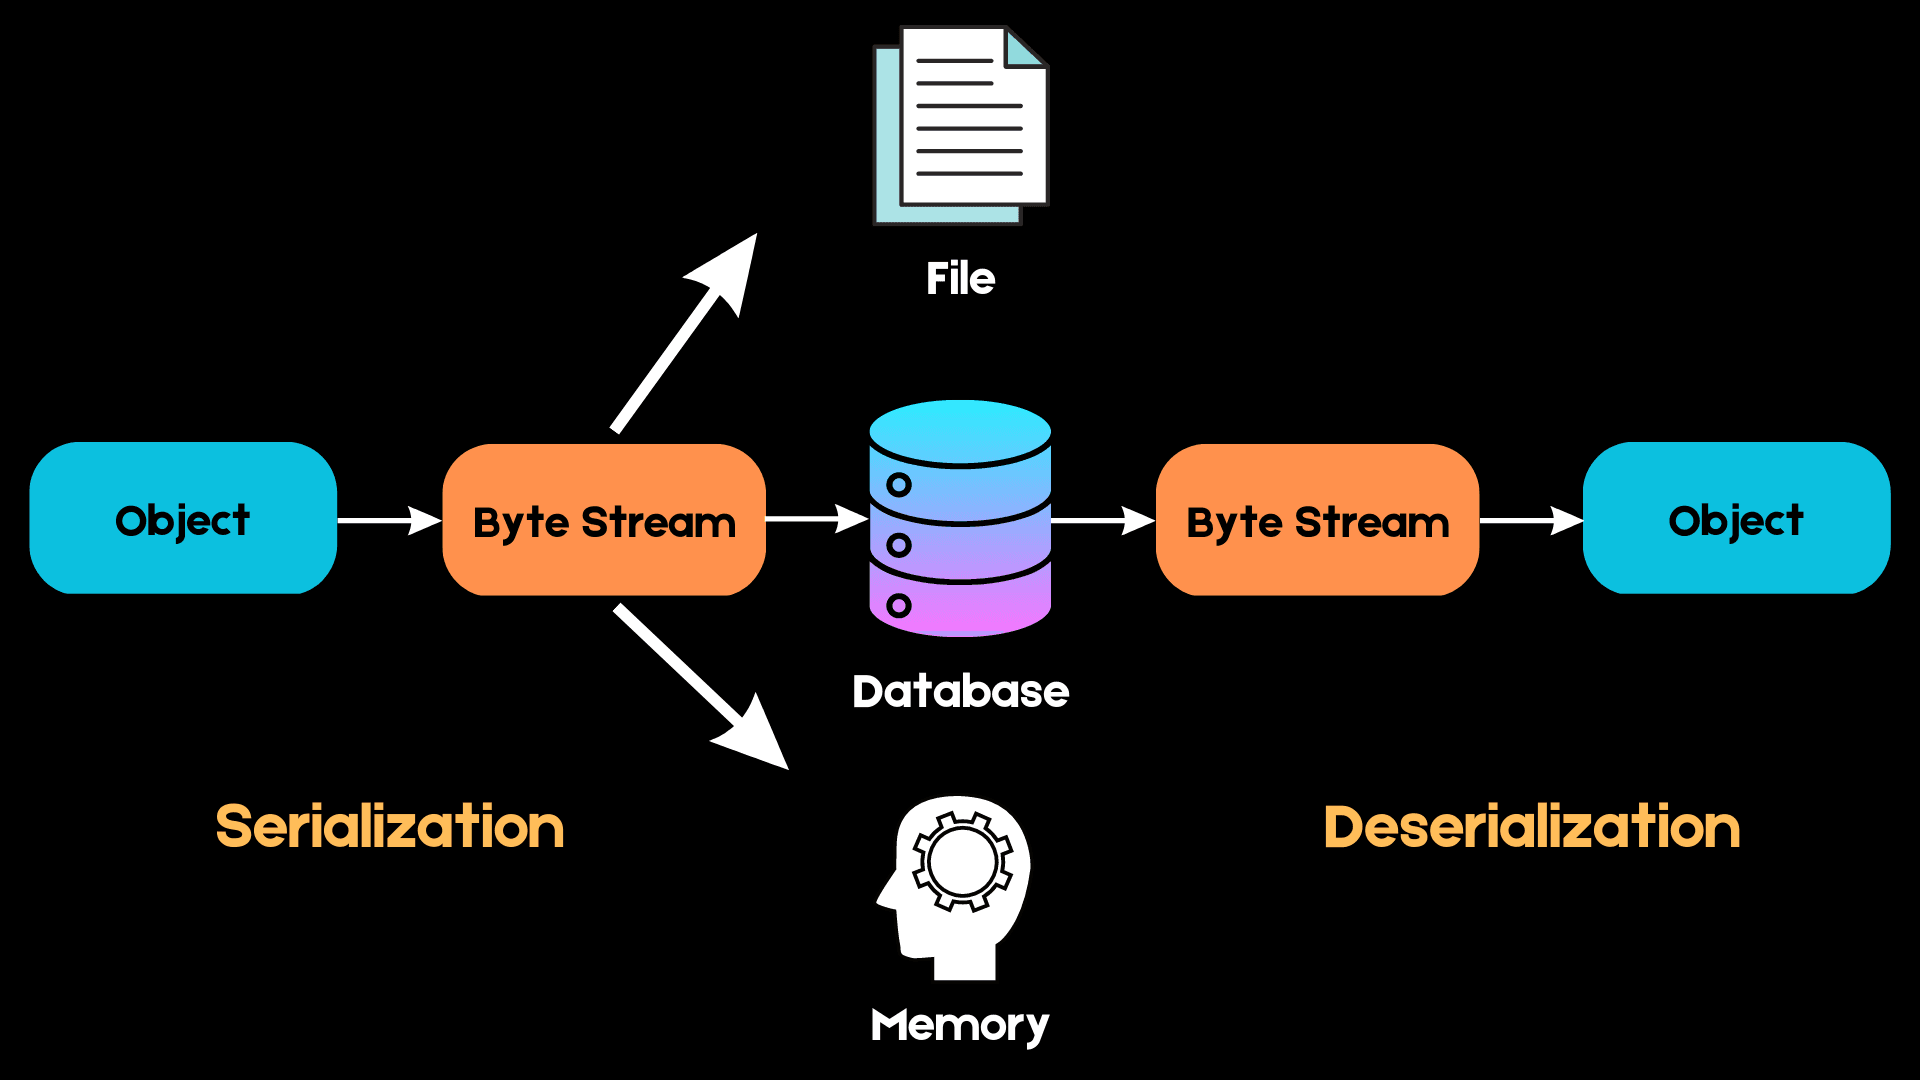

   we want to store high-level data structures such as lists, tuples, and sets objects in memory, they need to be converted into a **sequence of bytes**that the computer can understand. This process is called **serialization.**

this sequence of bytes must be converted back into the high-level object in a process known as **deserialization**.

We can use formats such as **JSON, XML, HDF5, and Pickle** for serialization.

**Need Object Serialization**

In [ ]:
students = {


  'Student 1': {
        'Name': "Alice", 'Age' :10, 'Grade':4,
    },

    'Student 2': {
        'Name':'Bob', 'Age':11, 'Grade':5
    },

    'Student 3': {
        'Name':'Elena', 'Age':14, 'Grade':8
    }

}

In [ ]:
#data type of the “students” object:
type(students)

dict

In [ ]:
print(students)

{'Student 1': {'Name': 'Alice', 'Age': 10, 'Grade': 4}, 'Student 2': {'Name': 'Bob', 'Age': 11, 'Grade': 5}, 'Student 3': {'Name': 'Elena', 'Age': 14, 'Grade': 8}}


**write it to a text file without serialization**:

In [ ]:
with open('student_info.txt','w') as data:
      data.write(str(students))

print(students)
print(type(students))

{'Student 1': {'Name': 'Alice', 'Age': 10, 'Grade': 4}, 'Student 2': {'Name': 'Bob', 'Age': 11, 'Grade': 5}, 'Student 3': {'Name': 'Elena', 'Age': 14, 'Grade': 8}}
<class 'dict'>


Python’s **Pickle module** is a  format used to serialize and deserialize data types. This format is native to Python, meaning Pickle objects cannot be loaded using any other programming language.

**Advantages of using Pickle to serialize objects**
1. Unlike serialization formats like JSON, which cannot handle tuples and datetime objects, Pickle can serialize almost every commonly used built-in Python data type.

2. It also retains the exact state of the object which JSON cannot do.

3. Pickle is also a good choice when storing recursive structures since it only writes an object once.

4. Pickle allows for flexibility when deserializing objects. You can easily save different variables into a Pickle file and load them back in a different Python session, recovering your data exactly the way it was without having to edit your code.


**Disadvantages of using Pickle**
1. Pickle is unsafe because it can execute malicious Python callables to construct objects. When deserializing an object, Pickle cannot tell the difference between a malicious callable and a non-malicious one. Due to this, users can end up executing arbitrary code during deserialization.
2. As mentioned previously, Pickle is a Python-specific module, and you may struggle to deserialize pickled objects when using a different language.
3. According to multiple benchmarks, Pickle appears to be slower and produces larger serialized values than formats such as JSON and ApacheThrift.

Pickle uses the following functions for serializing and deserializing Python objects:

`pickle.dump(obj, file, protocol=None, *, fix_imports=True, buffer_callback=None)`

`pickle.dumps(obj, protocol=None, *, fix_imports=True, buffer_callback=None)`

`pickle.load(file, *, fix_imports=True, encoding='ASCII', errors='strict', buffers=None)`


`pickle.loads(data, /, *, fix_imports=True, encoding=”ASCII”, errors=”strict”, buffers=None)`

**Example 1**

In [ ]:
import pickle

message = ['Welcome','to','the','session','on', 'pickle']

In [ ]:
with open('file.pkl', 'wb') as f:  # open a text file
    pickle.dump(message, f) # serialize the list

In [ ]:
f.close()

In [ ]:
with open('file.pkl', 'rb') as f:

    mesasge_loaded = pickle.load(f) # deserialize using load()
    print(mesasge_loaded)

['Welcome', 'to', 'the', 'session', 'on', 'pickle']


In [ ]:
print(type(mesasge_loaded))

<class 'list'>


In [ ]:
students = {
  'Student 1': {
        'Name': "Alice", 'Age' :10, 'Grade':4,
    },

    'Student 2': {
        'Name':'Bob', 'Age':11, 'Grade':5
    },

    'Student 3': {
        'Name':'Elena', 'Age':14, 'Grade':8
    }
}

In [ ]:
# serialize the dictionary to a pickle file

with open("student_dict.pkl", "wb") as f:
    pickle.dump(students, f)

# deserialize the dictionary and print it out

with open("student_dict.pkl", "rb") as f:
    deserialized_dict = pickle.load(f)
    print(deserialized_dict)

{'Student 1': {'Name': 'Alice', 'Age': 10, 'Grade': 4}, 'Student 2': {'Name': 'Bob', 'Age': 11, 'Grade': 5}, 'Student 3': {'Name': 'Elena', 'Age': 14, 'Grade': 8}}


In [ ]:
type(deserialized_dict)

dict

In [ ]:
print(
    "The first student's name is "
    + deserialized_dict["Student 1"]["Name"]
    + " and she is "
    + (str(deserialized_dict["Student 1"]["Age"]))
    + " years old."
)

The first student's name is Alice and she is 10 years old.


In [ ]:
import pandas as pd
import numpy as np

# Set random seed
np.random.seed(123)

data = {'Column1': np.random.randint(0, 10, size=100),
        'Column2': np.random.choice(['A', 'B', 'C'], size=100),
        'Column3': np.random.rand(100)}


# Create Pandas dataframe
df = pd.DataFrame(data)

In [ ]:
print(df)

    Column1 Column2   Column3
0         2       B  0.056083
1         2       A  0.067561
2         6       B  0.473872
3         1       C  0.509429
4         3       C  0.416795
..      ...     ...       ...
95        3       B  0.528206
96        4       A  0.553827
97        3       A  0.117207
98        1       A  0.784605
99        0       B  0.434586

[100 rows x 3 columns]


In [ ]:
import time

start = time.time()

df.to_csv('pandas_dataframe.csv')

end = time.time()
print(end - start)

0.007449150085449219


In [ ]:
start = time.time()


df.to_pickle("my_pandas_dataframe.pkl")


end = time.time()
print(end - start)

0.0016069412231445312


In [ ]:
import pickle
import time
import numpy as np

# Set random seed
np.random.seed(100)

data = {'Column1': np.random.randint(0, 10, size=100000),
        'Column2': np.random.choice(['A', 'B', 'C'], size=100000),
        'Column3': np.random.rand(100000)}

# serialize to a file

start = time.time()

with open("df1.pkl", "wb") as f:
    pickle.dump(data, f)

end = time.time()
print(end - start)

0.0034275054931640625


In [ ]:
# Reading the csv file into Pandas:

start1 = time.time()
df_csv = pd.read_csv("pandas_dataframe.csv")
end1 = time.time()
print("Time taken to read the csv file: " + str(end1 - start1) + "\n")

# Reading the Pickle file into Pandas:

start2 = time.time()
df_pkl = pd.read_pickle("my_pandas_dataframe.pkl")
end2 = time.time()
print("Time taken to read the Pickle file: " + str(end2 - start2))

Time taken to read the csv file: 0.00423741340637207

Time taken to read the Pickle file: 0.0014133453369140625


In [ ]:
start = time.time()

with open("df2.pkl", "wb") as f:
    pickle.dump(data, f, protocol=pickle.HIGHEST_PROTOCOL)

end = time.time()
print(end - start)

0.002847433090209961


In [ ]:
import _pickle as cPickle

start = time.time()

with open("df3.pkl", "wb") as f:
    cPickle.dump(data, f)

end = time.time()

print(end-start)

0.003896951675415039


In [ ]:
# Load  data from Local drive
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [ ]:
# # Data Preprocessing
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing the dataset
url="https://raw.githubusercontent.com/deepakmoud/datasets-for-experiment/main/Salary_Data.csv"
dataset = pd.read_csv(url)
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
# Description of data
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Print Total number of Rows & columns in dataset
dataset.shape

(30, 2)

In [ ]:
#Print Information about data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
#Print Information Datatypes
datatypes = dataset.dtypes
print(datatypes)

YearsExperience    float64
Salary             float64
dtype: object


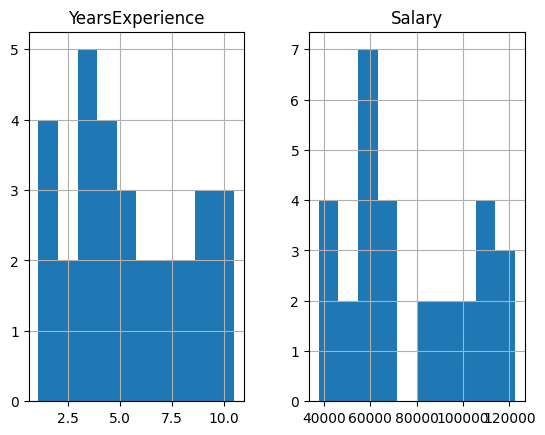

In [ ]:
# Data visualization
from matplotlib import pyplot
dataset.hist()
pyplot.show()

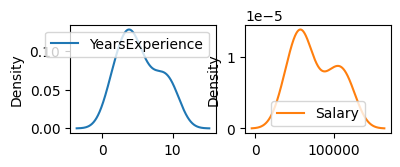

In [ ]:
# Data visualization
dataset.plot(kind='density' ,subplots=True, layout=(3,3), sharex=False)
pyplot.show()

In [ ]:
#Checking Missing values
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
# Extracting dependent and independent variables:
# Extracting independent variable:
X = dataset.iloc[:, 0:1].values
# Extracting dependent variable:
y = dataset.iloc[:, 1].values # this is for 1 d array  coming up this will make it 2-d array

In [ ]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [ ]:
print(y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


# scikit learn

In [ ]:
# Taking care of missing data
#handling missing data (Replacing missing data with the mean value)
from sklearn.impute import SimpleImputer #claeIss
imputer = SimpleImputer(missing_values= np.NAN, strategy= 'mean', fill_value=None,  copy=True)
#Fitting imputer object to the independent variables x.
imputer = imputer.fit(X[:, 0:1])
#Replacing missing data with the calculated mean value
X[:, 0:1]= imputer.transform(X[:, 0:1])

In [ ]:
details = pd.DataFrame(X, columns =['Experiance'])
details.isnull().sum()

Experiance    0
dtype: int64

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [ ]:
print(X_train)

[[ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 6.8]
 [ 1.3]
 [10.5]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9. ]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]]


In [ ]:
print(X_test)

[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]
 [ 9.6]
 [ 4. ]
 [ 5.3]
 [ 7.9]]


In [ ]:
print(y_test)

[ 37731. 122391.  57081.  63218. 116969. 109431. 112635.  55794.  83088.
 101302.]


In [ ]:
print(y_train)

[ 56642.  66029.  64445.  61111. 113812.  91738.  46205. 121872.  60150.
  39891.  81363.  93940.  57189.  54445. 105582.  43525.  39343.  98273.
  67938.  56957.]


In [ ]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
print(y_pred)

[ 40835.10590871 123079.39940819  65134.55626083  63265.36777221
 115602.64545369 108125.8914992  116537.23969801  64199.96201652
  76349.68719258 100649.1375447 ]


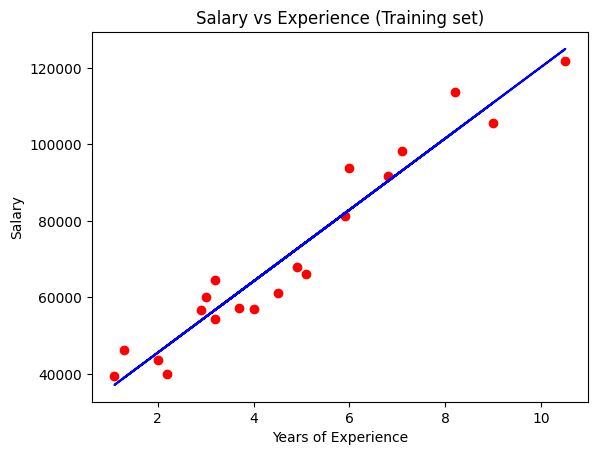

In [ ]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

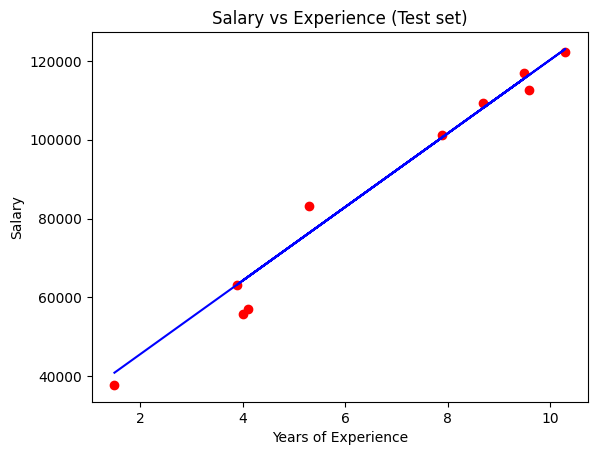

In [ ]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
print("Regressor slope:  %2.f  "%( regressor.coef_[0]))
print("Regressor intercept:%2.f  "% regressor.intercept_)

Regressor slope:  9346  
Regressor intercept:26816  


In [ ]:
YearsExperience= 5
print("Salary for given Years of Experience is :     %.2f"    %(regressor.predict([[YearsExperience]])))

Salary for given Years of Experience is :     73545.90


In [ ]:
from sklearn import metrics
print("MAE %2.f" %(metrics.mean_absolute_error(y_test,y_pred)))

MAE 3426


In [ ]:
from sklearn import metrics
print("RMSE %2.f" %(np.sqrt(metrics.mean_absolute_error(y_test,y_pred))))

RMSE 59


In [ ]:
print('Train Score: %f' %(regressor.score(X_train, y_train)))
print('Test Score: %f' % (regressor.score(X_test, y_test)) )
print("Underfitting")

Train Score: 0.938190
Test Score: 0.974915
Underfitting


In [ ]:
import pickle

# Save the trained model as a pickle string.
saved_model = pickle.dumps(regressor)

# Load the pickled model
saved_model = pickle.loads(saved_model)

# Use the loaded pickled model to make predictions
saved_model.predict(X_test)

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [ ]:

import joblib
filename = '/content/drive/My Drive/linear.sav'
joblib.dump(regressor, filename)

# some time later...

# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.9749154407708353


In [ ]:
Experiance =  15#@param {type:"number"}
exp =  6#@param {type:"number"}



output= saved_model.predict([[exp]])
print("Salary for given exp:", output)

Salary for given exp: [82891.84690277]


In [ ]:
import pickle
print("[INFO] Saving model...")
# Save the trained model as a pickle string.
saved_model=pickle.dump(regressor,open('/content/drive/My Drive/linearregression.pkl', 'wb'))
# Saving model to disk

[INFO] Saving model...


In [ ]:
# Load the pickled model
import pickle
model = pickle.load(open('/content/drive/My Drive/linearregression.pkl','rb'))
# Use the loaded pickled model to make predictions
model.predict(X_test)

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Python Flask is a popular web framework for developing web applications

Flask is a micro web framework written in Python. It is classified as a microframework because it does not require particular tools or libraries.

google colab provides VM(virtual machine) hence we do not access the local-host. We will use it in to a public URL using ngrok.

In [ ]:
!pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The reason is that the flask server creates a server that runs locally on the allocated runtime on google colab as localhost. In order to expose the server to the outside traffic or to make the server accessible outside the runtime globally on HTTP, ngrok is used.

we will use templates to render HTML which will display in the user’s browser. This folder contains html form file index.html.

In [ ]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 24.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19867 sha256=19bc178c514d83e84d8ae2d2992812ea7dad65e9eb4b604ddedfa73af0e16bfd
  Stored in directory: /root/.cache/pip/wheels/5c/42/78/0c3d438d7f5730451a25f7ac6cbf4391759d22a67576ed7c2c
Successfully built pyngrok


In [ ]:
!ngrok authtoken 2Ltrxzr7all8wsh0grVdO7aQTIY_4pGibLxJNd6gHN1TCCP24

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
%mkdir templates -p

The action attribute tells flask which route (and therefore function) should be called when the form is submitted.
<form action="{{ url_for('predict')}}"method="get">


In [ ]:
%%writefile templates/index.html
<!DOCTYPE html>
<html >
<!--From https://codepen.io/frytyler/pen/EGdtg-->
<head>
<title>Machine Learning  Linear Regression Deployment</title>
<meta charset="UTF-8">

<link href='https://fonts.googleapis.com/css?family=Open+Sans+Condensed:300' rel='stylesheet' type='text/css'>
<!-- JavaScript Bundle with Popper -->
<script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.0/dist/js/bootstrap.bundle.min.js" integrity="sha384-A3rJD856KowSb7dwlZdYEkO39Gagi7vIsF0jrRAoQmDKKtQBHUuLZ9AsSv4jD4Xa" crossorigin="anonymous"></script>
<link href="https://cdn.jsdelivr.net/npm/bootstrap@5.0.0-beta1/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-giJF6kkoqNQ00vy+HMDP7azOuL0xtbfIcaT9wjKHr8RbDVddVHyTfAAsrekwKmP1" crossorigin="anonymous">
<style><!DOCTYPE html>

h1 {text-align: center;}
h2 {text-align: center;}
h3 {text-align: center;}
p {text-align: center;}
div {text-align: center;}
</style>
</head>

<body>

<div class="" style="background-color:grey;" >
<div class="clearfix">

<div class="col-md-12">
<center><p style="font-size:40px;color:white;margin-top:10px;">Session on Linear Regression</p></center>
<center><p style="font-size:30px;color:white;margin-top:10px;">Project Deployment</p></center>
<center><p style="font-size:25px;color:white;margin-top:10px;">Estimation of salary on the bais of Experiance</p></center>
</div>
</div>
</div>

<div class="login">
<h2 >Linear Regression for salary Prediction </h2>

<!-- Main Input For Receiving Query to our ML -->
<form action="{{ url_for('predict')}}"method="get">

<div class="form-floating mb-3">
<input type="number" class="form-control" id="exp" name="exp" step=0.01 placeholder="Experiance in years" min="1.0" max="100.0" required="required" />
<label for="floatingInput">Enter Experiance in Years</label>
</div>
<br>

<br>
<button type="submit" class="btn btn-primary btn-block btn-large">Predict salary</button>
<br>

</form>
<br>
<br>
{{ prediction_text }}

</div>

<div class="" style="background-color:orange;" >
<div class="clearfix">

<div class="col-md-12">

 <center><p style="font-size:25px;color:white;margin-top:20px;">Developed by Deepak Moud </p></center>
</div>
</div>
</div>
</body>
</html>

Overwriting templates/index.html


pyngrok is a Python wrapper for ngrok that manages its own binary, making ngrok available via a convenient Python API.

ngrok is a reverse proxy tool that opens secure tunnels from public URLs to localhost, perfect for exposing local web servers, building webhook integrations, enabling SSH access, testing chatbots, demoing from your own machine, and more, and its made even more powerful with native Python integration through pyngrok.

 1. import the libraries

2. app=Flask(__name__) create an instance of flask.

3. @app.route('/') is used to tell flask what url should trigger the function home() and in the function home we use render_template('index.html') to display the script index.html in the browser.

In [ ]:

import numpy as np
from flask import Flask, request, jsonify, render_template
from flask_ngrok import run_with_ngrok
import pickle


app = Flask(__name__)
model = pickle.load(open('/content/drive/My Drive/linearregression.pkl','rb'))
run_with_ngrok(app)

@app.route('/')
def home():

    return render_template("index.html")

@app.route('/predict',methods=['GET'])
def predict():


    '''
    For rendering results on HTML GUI
    '''
    exp = float(request.args.get('exp'))

    prediction = model.predict([[exp]])


    return render_template('index.html', prediction_text='Regression Model  has predicted salary for given experinace is : %.2f'%(prediction))


app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://9806-34-87-159-143.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [20/Jun/2023 05:43:35] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Jun/2023 05:43:36] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [20/Jun/2023 05:43:41] "GET /predict?exp=3.6 HTTP/1.1" 200 -


https://github.com/deepakmoud/Internship-Linear-regression

http://regression.pythonanywhere.com/


https://github.com/deepakmoud/Pythonanywhere-Deployment-steps/blob/main/how-to-use-pythonanywhere.md

Model deployment on Cloud

Click==7.0

Flask==1.1.1

gunicorn==19.9.0

itsdangerous==1.1.0

Jinja2==2.10.1

MarkupSafe==1.1.1

Werkzeug==0.15.6

For Heroku to be able to run our application like it should, we need to define a set of processes/commands that it should run beforehand. These commands are located in the Procfile:

Gunicorn 'Green Unicorn' is a Python WSGI HTTP Server for UNIX. It's a pre-fork worker model. The Gunicorn server is broadly compatible with various web frameworks, simply implemented, light on server resources, and fairly speedy.

*web: gunicorn app:app *
The web command tells Heroku to start a web server for the application, using gunicorn. Since our application is called app.py, we've set the app name to be app as well.

Now all of the necessary files should be in your local repo: your python script (for Streamlit)

Procfile


requirements.txt

Any files that are read into the python script need to be in the directory as well.